# Configuring pandas

### Documentation - https://pandas.pydata.org/docs/reference/index.html

In [73]:
# import numpy and pandas
import numpy as np
import pandas as pd
import csv as csv
# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# The pandas Series
#### A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type. Read the documentation and create a series that contains 4 items. After that finish the following given cells.

In [74]:
# create a four item Series
seriesWithFourItems = pd.Series([1,2,3,4])

In [75]:
# get value at label 1
seriesWithFourItems[1]

2

In [76]:
# Write a snippet of code that will return a Series with the row with labels 1 and 3
seriesWithFourItems[[1,3]]

1    2
3    4
dtype: int64

In [77]:
# create the same series but this time using an explicit index
seriesWithFourItems = pd.Series(data = [5,6,7,8], index = [1,2,3,4])

In [78]:
# look up items the series having index at first and index at last position
seriesWithFourItems[[1,4]]

1    5
4    8
dtype: int64

In [79]:
# get only the index of the Series
seriesWithFourItems.index


Int64Index([1, 2, 3, 4], dtype='int64')

In [80]:
# create a Series who's index is a series of dates
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
# between the two specified dates (inclusive)
# Dates: September 5, 2022 to September 11, 2022
dateSeries = pd.date_range('2022-09-05', '2022-09-11')
dateSeries


DatetimeIndex(['2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10', '2022-09-11'],
              dtype='datetime64[ns]', freq='D')

In [81]:
# create a Series with values (representing temperatures) for each date in the index
# You can give them hardcoded values for now [80, 82, 85, 90, 83, 87, 80, 78]
# You can call this series clt_temp
clt_temp = pd.Series([80, 82, 85, 90, 83, 87, 80], index = dateSeries)

In [82]:
# what's the temperation for September 9?
clt_temp['2022-09-09']

83

In [83]:
# create a second series of values using the same index
# You can give them hardcoded values for now [70, 75, 69, 83, 79, 77, 74, 79]
# You can call this series nycTemp
nycTemp = pd.Series([70, 75, 69, 83, 79, 77, 74], index = dateSeries)

In [84]:
# the series clt_temp and nyc_temp are aligned by their index values
# calculates the difference by those matching labels

In [85]:
# Write the code to find the temperature difference on September 8?
clt_temp['2022-09-08']-nycTemp['2022-09-08']

7

In [86]:
# Write code to find an average difference of temperature between the 2 cities?
tempAvg = (sum(clt_temp-nycTemp)/(len(clt_temp)))
tempAvg

8.571428571428571

# The pandas DataFrame

In [87]:
# create a DataFrame from the two series objects clt_temp and nyc_temp
# and give them column names
temps_df = pd.DataFrame(
    {'Charlotte': clt_temp, 
     'NYC': nycTemp})
temps_df

            Charlotte  NYC
2022-09-05         80   70
2022-09-06         82   75
2022-09-07         85   69
2022-09-08         90   83
2022-09-09         83   79
2022-09-10         87   77
2022-09-11         80   74

In [88]:
# get the column with the name Charlotte
temps_df['Charlotte']

2022-09-05    80
2022-09-06    82
2022-09-07    85
2022-09-08    90
2022-09-09    83
2022-09-10    87
2022-09-11    80
Freq: D, Name: Charlotte, dtype: int64

In [89]:
# likewise we can get just the NYC column
temps_df['NYC']

2022-09-05    70
2022-09-06    75
2022-09-07    69
2022-09-08    83
2022-09-09    79
2022-09-10    77
2022-09-11    74
Freq: D, Name: NYC, dtype: int64

In [90]:
# return both columns in a different order
temps_df[['NYC', 'Charlotte']]

            NYC  Charlotte
2022-09-05   70         80
2022-09-06   75         82
2022-09-07   69         85
2022-09-08   83         90
2022-09-09   79         83
2022-09-10   77         87
2022-09-11   74         80

In [91]:
# retrieve the Charlotte column through PROPERTY SYNTAX
temps_df.Charlotte

2022-09-05    80
2022-09-06    82
2022-09-07    85
2022-09-08    90
2022-09-09    83
2022-09-10    87
2022-09-11    80
Freq: D, Name: Charlotte, dtype: int64

In [92]:
# calculate the temperature difference between the two cities using the dataframe
temps_df.Charlotte - temps_df.NYC

2022-09-05    10
2022-09-06     7
2022-09-07    16
2022-09-08     7
2022-09-09     4
2022-09-10    10
2022-09-11     6
Freq: D, dtype: int64

In [93]:
# add a column to temp_df which contains the difference in temps you can call the column Difference
temps_df['Difference'] = temps_df['Charlotte'] - temps_df['NYC']

In [94]:
# get the columns of the dataframe, which is also an Index object
temps_df.iloc[0]

Charlotte     80
NYC           70
Difference    10
Name: 2022-09-05 00:00:00, dtype: int64

In [95]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df['Difference'][1:5]

2022-09-06     7
2022-09-07    16
2022-09-08     7
2022-09-09     4
Freq: D, Name: Difference, dtype: int64

In [96]:
# get the row at array position 1
temps_df.iloc[0]

Charlotte     80
NYC           70
Difference    10
Name: 2022-09-05 00:00:00, dtype: int64

In [97]:
# the names of the columns have become the index
# they have been 'pivoted'


In [98]:
# retrieve a random row of your choice by index label using .loc
temps_df.loc['2022-09-05']

Charlotte     80
NYC           70
Difference    10
Name: 2022-09-05 00:00:00, dtype: int64

In [99]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1,3,5]].Difference

2022-09-06     7
2022-09-08     7
2022-09-10    10
Freq: 2D, Name: Difference, dtype: int64

In [100]:
# which values in the Missoula column are > 82?
temps_df.Charlotte >82

2022-09-05    False
2022-09-06    False
2022-09-07     True
2022-09-08     True
2022-09-09     True
2022-09-10     True
2022-09-11    False
Freq: D, Name: Charlotte, dtype: bool

In [101]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Charlotte >82]

            Charlotte  NYC  Difference
2022-09-07         85   69          16
2022-09-08         90   83           7
2022-09-09         83   79           4
2022-09-10         87   77          10

# Loading data from a CSV file into a DataFrame

In [102]:
# read the contents of the file activity3_0.csv into a DataFrame. Call the dataframe df
df = pd.read_csv('/Users/himat/Documents/UNCC/Fall 2022/ITCS 3190/activity3_0.csv')

In [103]:
# Print the contents of the date column
df['Date']

0     12/19/2016
1     12/20/2016
2     12/21/2016
3     12/22/2016
4     12/23/2016
         ...    
56     3/13/2017
57     3/14/2017
58     3/15/2017
59     3/16/2017
60     3/17/2017
Name: Date, Length: 61, dtype: object

In [104]:
# Get the first value in the date column
df['Date'][0]

'12/19/2016'

In [105]:
# Write the code to get the type of the Date
df.dtypes['Date']


dtype('O')

In [106]:
# read the data and tell pandas the date column should be a date in the resulting DataFrame
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df2 = pd.read_csv('/Users/himat/Documents/UNCC/Fall 2022/ITCS 3190/activity3_0.csv', parse_dates=['Date'])


In [107]:
# verify the type now is date
# in pandas, this is actually a Timestamp
df2.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [108]:
# unfortunately the index is numeric which makes accessing data by date more complicated
# read in again, now specity the data column as being the index of the resulting DataFrame
df3 = pd.read_csv('/Users/himat/Documents/UNCC/Fall 2022/ITCS 3190/activity3_0.csv', parse_dates=['Date'], index_col='Date')

In [109]:
# Verify that the index is now a DatetimeIndex by calling df.index
df3.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

# Visualization

<AxesSubplot:xlabel='Close'>

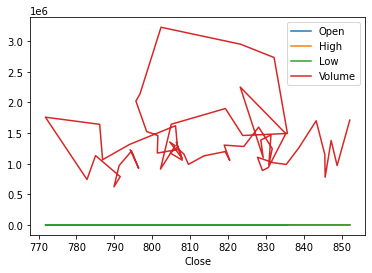

In [110]:
# plots the values in the Close column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df3.plot('Close')

# Thats it for today :D Good job!!!!

#### Submit this notebook on canvas and you will be graded for correctness. Make sure that you are not cutting corners or shortcuts 